<a href="https://colab.research.google.com/github/KorKanticha/SeniorProject/blob/main/Optimized_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Optimized DecisionTree

#Base Model


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [22]:
xls_Suicide = pd.ExcelFile("/content/gdrive/MyDrive/SeniorProject_KorBoss/Cleaned_Dummy8.xlsx")
df = dict()
df = pd.read_excel(xls_Suicide)

In [43]:
#split dataset in features and target variable
list_col = list(df.columns)
feature_cols = list(list_col)
feature_cols.remove("Success")
#feature_cols = ['Gender_หญิง', 'Age', 'Province_Happen_11', 'Province_Happen_12', 'Province_Happen_13', 'Province_Happen_14', 'Province_Happen_15', 'Province_Happen_16', 'Province_Happen_17', 'Province_Happen_18', 'Province_Happen_19', 'Province_Happen_20', 'Province_Happen_21', 'Province_Happen_22', 'Province_Happen_23', 'Province_Happen_24', 'Province_Happen_25', 'Province_Happen_26', 'Province_Happen_27', 'Province_Happen_30', 'Province_Happen_31', 'Province_Happen_32', 'Province_Happen_33', 'Province_Happen_34', 'Province_Happen_35', 'Province_Happen_36', 'Province_Happen_37', 'Province_Happen_38', 'Province_Happen_39', 'Province_Happen_40', 'Province_Happen_41', 'Province_Happen_42', 'Province_Happen_43', 'Province_Happen_44', 'Province_Happen_45', 'Province_Happen_46', 'Province_Happen_47', 'Province_Happen_48', 'Province_Happen_49', 'Province_Happen_50', 'Province_Happen_51', 'Province_Happen_52', 'Province_Happen_53', 'Province_Happen_54', 'Province_Happen_55', 'Province_Happen_56', 'Province_Happen_57', 'Province_Happen_58', 'Province_Happen_60', 'Province_Happen_61', 'Province_Happen_62', 'Province_Happen_63', 'Province_Happen_64', 'Province_Happen_65', 'Province_Happen_66', 'Province_Happen_67', 'Province_Happen_70', 'Province_Happen_71', 'Province_Happen_72', 'Province_Happen_73', 'Province_Happen_74', 'Province_Happen_75', 'Province_Happen_76', 'Province_Happen_77', 'Province_Happen_80', 'Province_Happen_81', 'Province_Happen_82', 'Province_Happen_83', 'Province_Happen_84', 'Province_Happen_85', 'Province_Happen_86', 'Province_Happen_90', 'Province_Happen_91', 'Province_Happen_92', 'Province_Happen_93', 'Province_Happen_94', 'Province_Happen_95', 'Province_Happen_96', 'Province_Happen_ต่างประเทศ', 'Status_คู่', 'Status_สมณะ', 'Status_หม้าย', 'Status_หย่า', 'Status_แยก', 'Status_โสด', 'Religion_คริสต์', 'Religion_ซิกข์', 'Religion_บาไฮ', 'Religion_พุทธ', 'Religion_อิสลาม', 'Religion_ไม่นับถือศาสนา', 'WTK_Overdose_1', 'WTK_Insecticide_1', 'WTK_Herbicide_1', 'WTK_Other_Chemicals_1', 'WTK_Sharp_Weapons_1', 'WTK_Guns_1', 'WTK_Jump_Off_Building_1', 'WTK_Hang_1', 'WTK_Jump_Into_Water_1', 'WTK_Ran_Into_Cars_1', 'WTK_Smoke_Gas_1', 'Disease_M_Physcopath_1', 'Disease_M_Depression_1', 'Disease_M_Others_1', 'Disease_P_Diabetes_1', 'Disease_P_HBP_1', 'Disease_P_Cardio_1', 'Disease_P_Kidney_1', 'Disease_P_Liver_1', 'Disease_P_lung_1', 'Disease_P_Migrant_1', 'Disease_P_Joint_1', 'Disease_P_Paralyze_1', 'Disease_P_Cancer_1', 'Disease_P_HIV_1', 'Disease_P_Others_1', 'Time_Group_1', 'Time_Group_2', 'Time_Group_3', 'Time_Group_4', 'Time_Group_5', 'Time_Group_6', 'Month_Group_1', 'Month_Group_2', 'Month_Group_3', 'Month_Group_4', 'Attempt_Year', 'Attempt_Hurt_Others_0', 'Attempt_Hurt_Others_1', 'Attempt_Ever_0', 'Attempt_Ever_1', 'Attempt_To_Die_0', 'Attempt_To_Die_1', 'Attempt_Sign_0', 'Attempt_Sign_1', 'Factor_R_Neglected_1', 'Factor_R_Humuliated_1', 'Factor_R_Jeolous_1', 'Factor_R_Qurrel_1', 'Factor_R_Needy_1', 'Factor_R_Lost_1', 'Factor_R_Aging_Lonesome_1', 'Factor_R_Working_Environment_1', 'Factor_Alcoholic_0', 'Factor_Alcoholic_1', 'Factor_A_At_Sucide_Attempt_1', 'Factor_Drugs_0', 'Factor_Drugs_1', 'Factor_D_At_Sucide_Attempt_1', 'Factor_Di_Lonesone_0', 'Factor_Di_Lonesone_1', 'Factor_Di_Pain_0', 'Factor_Di_Pain_1', 'Factor_Economic_0', 'Factor_Economic_1', 'Factor_E_Poor_0', 'Factor_E_Poor_1', 'Factor_E_Unemployed_0', 'Factor_E_Unemployed_1', 'Factor_E_Dept_0', 'Factor_E_Dept_1', 'Factor_Others_1', 'Disease_P_Direct_COVID_1', 'Disease_P_COVID_1', 'Factor_C_Unemployed_0', 'Factor_C_Unemployed_1', 'Factor_C_Poor_0', 'Factor_C_Poor_1', 'Factor_C_Dept_0', 'Factor_C_Dept_1', 'Factor_C_Mental_0', 'Factor_C_Mental_1', 'Factor_C_Others_0', 'Factor_C_Others_1']
feature_cols = ['Gender_หญิง', 'Age', 'Status_คู่', 'Status_สมณะ', 'Status_หม้าย', 'Status_หย่า', 'Status_แยก', 'Status_โสด', 'Religion_คริสต์', 'Religion_ซิกข์', 'Religion_บาไฮ', 'Religion_พุทธ', 'Religion_อิสลาม', 'Religion_ไม่นับถือศาสนา', 'Disease_M_Physcopath_1', 'Disease_M_Depression_1', 'Disease_M_Others_1', 'Disease_P_Diabetes_1', 'Disease_P_HBP_1', 'Disease_P_Cardio_1', 'Disease_P_Kidney_1', 'Disease_P_Liver_1', 'Disease_P_lung_1', 'Disease_P_Migrant_1', 'Disease_P_Joint_1', 'Disease_P_Paralyze_1', 'Disease_P_Cancer_1', 'Disease_P_HIV_1', 'Disease_P_Others_1', 'Attempt_Ever_0', 'Attempt_Ever_1', 'Attempt_Sign_0', 'Attempt_Sign_1', 'Factor_R_Neglected_1', 'Factor_R_Humuliated_1', 'Factor_R_Jeolous_1', 'Factor_R_Qurrel_1', 'Factor_R_Needy_1', 'Factor_R_Lost_1', 'Factor_R_Aging_Lonesome_1', 'Factor_R_Working_Environment_1', 'Factor_Alcoholic_0', 'Factor_Alcoholic_1', 'Factor_Drugs_0', 'Factor_Drugs_1', 'Factor_Di_Lonesone_0', 'Factor_Di_Lonesone_1', 'Factor_Di_Pain_0', 'Factor_Di_Pain_1', 'Factor_Economic_0', 'Factor_Economic_1', 'Factor_E_Poor_0', 'Factor_E_Poor_1', 'Factor_E_Unemployed_0', 'Factor_E_Unemployed_1', 'Factor_E_Dept_0', 'Factor_E_Dept_1', 'Factor_Others_1', 'Disease_P_Direct_COVID_1', 'Disease_P_COVID_1', 'Factor_C_Unemployed_0', 'Factor_C_Unemployed_1', 'Factor_C_Poor_0', 'Factor_C_Poor_1', 'Factor_C_Dept_0', 'Factor_C_Dept_1', 'Factor_C_Mental_0', 'Factor_C_Mental_1', 'Factor_C_Others_0', 'Factor_C_Others_1']
print(list(feature_cols))

['Gender_หญิง', 'Age', 'Status_คู่', 'Status_สมณะ', 'Status_หม้าย', 'Status_หย่า', 'Status_แยก', 'Status_โสด', 'Religion_คริสต์', 'Religion_ซิกข์', 'Religion_บาไฮ', 'Religion_พุทธ', 'Religion_อิสลาม', 'Religion_ไม่นับถือศาสนา', 'Disease_M_Physcopath_1', 'Disease_M_Depression_1', 'Disease_M_Others_1', 'Disease_P_Diabetes_1', 'Disease_P_HBP_1', 'Disease_P_Cardio_1', 'Disease_P_Kidney_1', 'Disease_P_Liver_1', 'Disease_P_lung_1', 'Disease_P_Migrant_1', 'Disease_P_Joint_1', 'Disease_P_Paralyze_1', 'Disease_P_Cancer_1', 'Disease_P_HIV_1', 'Disease_P_Others_1', 'Attempt_Ever_0', 'Attempt_Ever_1', 'Attempt_Sign_0', 'Attempt_Sign_1', 'Factor_R_Neglected_1', 'Factor_R_Humuliated_1', 'Factor_R_Jeolous_1', 'Factor_R_Qurrel_1', 'Factor_R_Needy_1', 'Factor_R_Lost_1', 'Factor_R_Aging_Lonesome_1', 'Factor_R_Working_Environment_1', 'Factor_Alcoholic_0', 'Factor_Alcoholic_1', 'Factor_Drugs_0', 'Factor_Drugs_1', 'Factor_Di_Lonesone_0', 'Factor_Di_Lonesone_1', 'Factor_Di_Pain_0', 'Factor_Di_Pain_1', 'Fact

In [44]:

X = df[feature_cols] # Features
y = df.Success # Target variable

# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 


# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


from sklearn.metrics import precision_score
micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)




Accuracy: 0.784680337756333
Micro-averaged precision score: 0.78
Macro-averaged precision score: 0.75
Per-class precision score: [0.84681408 0.64573845]


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, y_pred)

array([[5821, 1053],
       [1089, 1985]])

In [46]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      6874
         1.0       0.65      0.65      0.65      3074

    accuracy                           0.78      9948
   macro avg       0.75      0.75      0.75      9948
weighted avg       0.78      0.78      0.78      9948



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3627 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3641 missing from current font.
  font.set_text(s

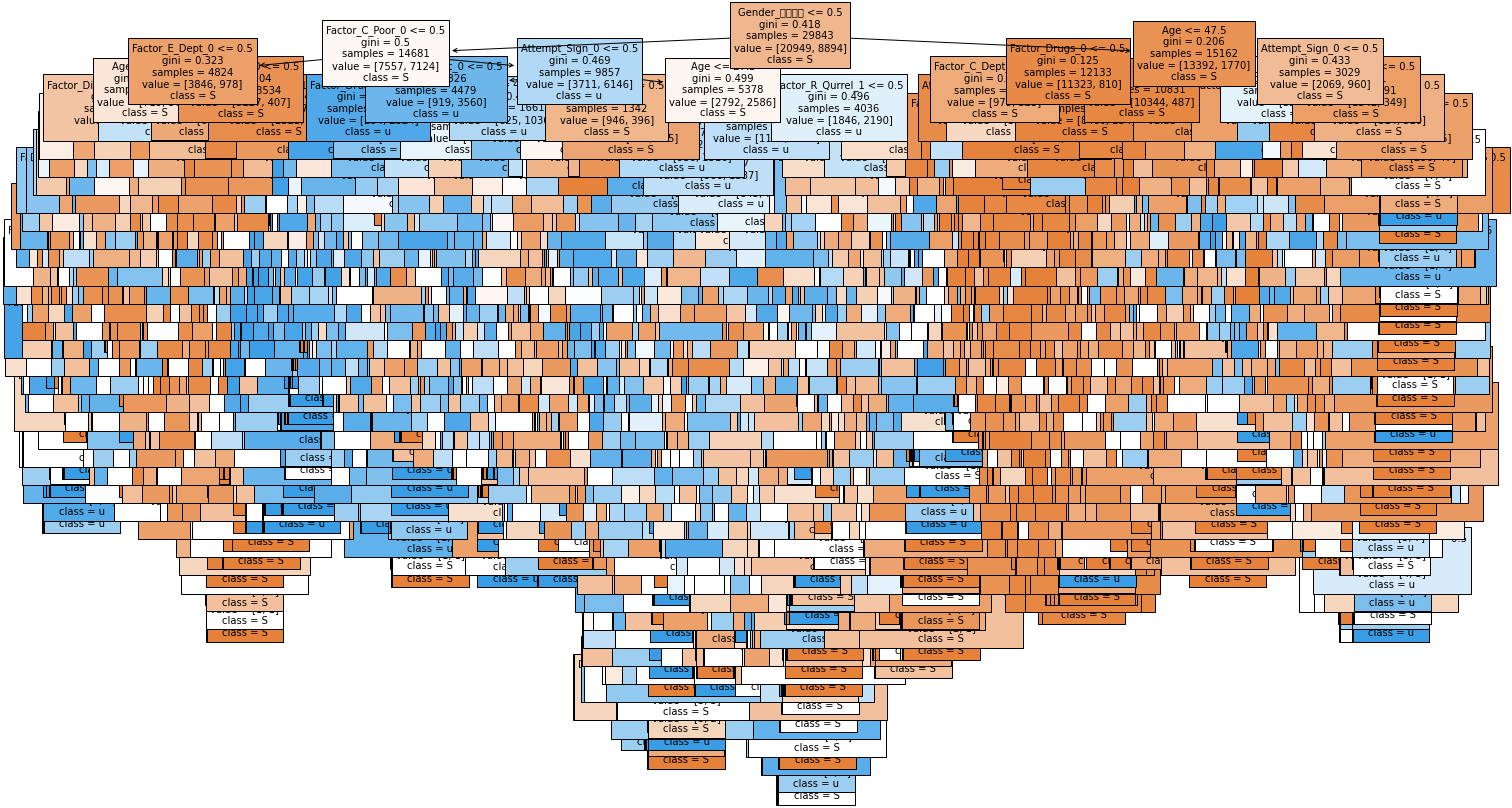

In [47]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (24,14))
_ = tree.plot_tree(clf, 
feature_names= feature_cols,  class_names="Success",filled=True , fontsize = 10)

#Optimize Model

Step 1 - Import the library - GridSearchCv
Here we have imported various modules like decomposition, datasets, tree, Pipeline, StandardScaler and GridSearchCV from differnt libraries. We will understand the use of these later while using it in the in the code snipet.
For now just have a look on these imports.

In [48]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

Step 2 - Setup the Data
Here we have used datasets to load the inbuilt wine dataset and we have created objects X and y to store the data and the target value respectively.

In [49]:
#dataset = datasets.load_wine()
#X = dataset.data
#y = dataset.target

Step 3 - Using StandardScaler and PCA
StandardScaler is used to remove the outliners and scale the data by making the mean of the data 0 and standard deviation as 1. So we are creating an object std_scl to use standardScaler.


In [50]:
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

Step 5 - Using Pipeline for GridSearchCV
Pipeline will helps us by passing modules one by one through GridSearchCV for which we want to get the best parameters. So we are making an object pipe to create a pipeline for all the three objects std_scl, pca and dec_tree.

In [51]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

Step 6 - Using GridSearchCV and Printing Results

In [52]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components']) 
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])


KeyboardInterrupt: ignored

In [53]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


from sklearn.metrics import precision_score
micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)

print(classification_report(y_test,y_pred))


Accuracy: 0.8265983112183354
Micro-averaged precision score: 0.83
Macro-averaged precision score: 0.80
Per-class precision score: [0.86819901 0.73357189]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      6874
         1.0       0.71      0.73      0.72      3074

    accuracy                           0.83      9948
   macro avg       0.80      0.80      0.80      9948
weighted avg       0.83      0.83      0.83      9948



Confusion matrix

 [[5968  906]
 [ 819 2255]]

True Positives(TP) =  5968

True Negatives(TN) =  2255

False Positives(FP) =  906

False Negatives(FN) =  819


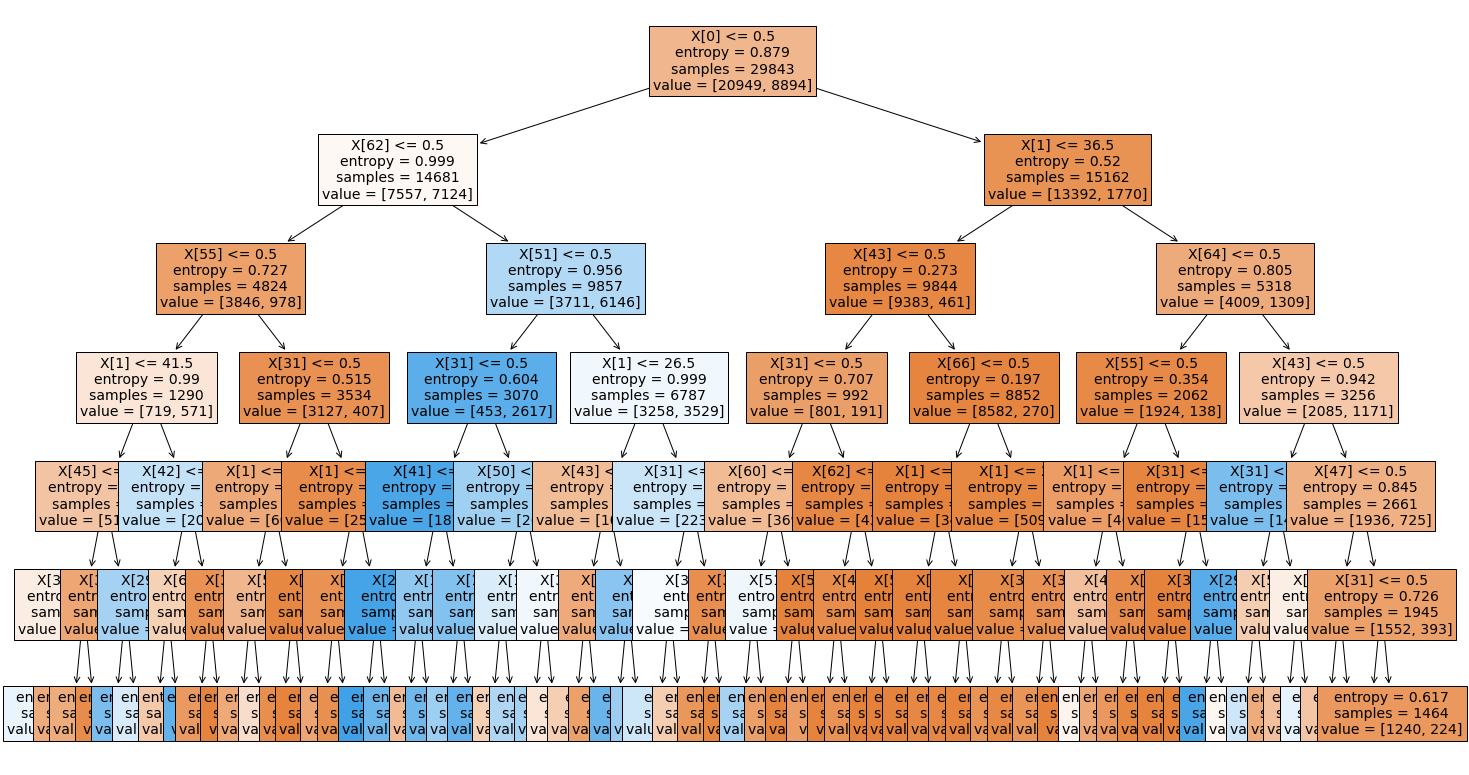

In [54]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])
import matplotlib.pyplot as plt
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns_heatmap = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
%matplotlib inline

plt.figure(figsize=(24,14))
tree.plot_tree(clf, filled=True, fontsize=14)
fig = sns_heatmap.get_figure()
fig.savefig('hist.png', dpi = 300)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3627 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3641 missing from current font.
  font.set_text(s

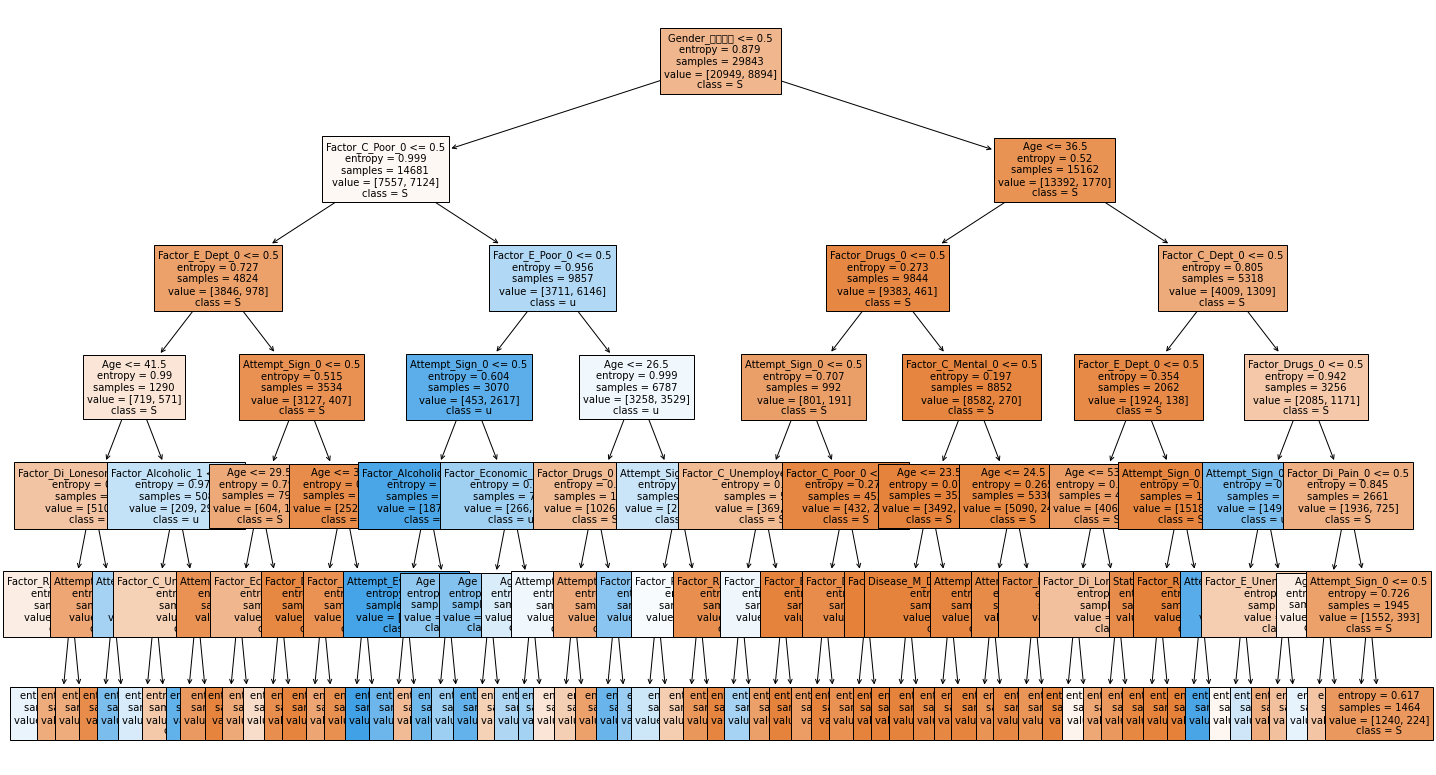

In [55]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize = (24,14))
_ = tree.plot_tree(clf,feature_names= feature_cols,  class_names="Success",filled=True , fontsize = 10)
